<a href="https://colab.research.google.com/github/haenoya/AIproject/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본세팅

In [ ]:
# 한글폰트를 설정합니다.
#1.나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#2.런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,833 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

#3.matplotlib의 폰트를 Nanum 폰트로 지정합니다
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np

import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, Binarizer
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris, load_breast_cancer, load_digits, load_boston

# using graphviz 
from graphviz import Source
from sklearn.tree import export_graphviz

import statsmodels.api as sm
import scipy.stats as stats

# 할일들
4.5 선형적인 독립변수 개발하기
+ 변수 세분화 : 모든 연속형 변수를 그룹으로 세분화 시켜서 범주형 변수로 만들기 (10개의 그룹으로 나눠서 분할표 확인)

  3IQR로 전처리 했을 때랑 비교해보기
+ 변수 변환
+ 범주형 변수 -> 지시변수 생성
 


4.6 상호 작용 찾기

의사결정 나무로부터 얻어진 상호작용 정보 이용하기

5.1.2 변수 선택 & 십분위분석

6.3 재표본 방법

# 데이터 전처리

In [ ]:
heart = pd.read_csv("/content/SAheart.data")
heart

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


id와 index가 맞지 않음

In [ ]:
heart.rename(columns = {'row.names' : 'id'}, inplace =True)
heart

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [ ]:
for i in range(462):
  if heart.id[i] != (i+1):
    print(i,heart.id[i])
    break

261 263


In [ ]:
# 262번 id가 없음
heart.iloc[260:263]

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
260,261,118,0.00,2.39,12.13,Absent,49,18.46,0.26,17,1
261,263,124,0.61,2.69,17.15,Present,61,22.76,11.55,20,0
262,264,124,1.04,2.84,16.42,Present,46,20.17,0.00,61,0


In [ ]:
# id를 다시 지정
heart.id = range(1,463)
heart

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,458,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,459,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,460,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,461,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


##결측값 확인

In [ ]:
# target : chd(만성폐쇄성 폐질환)
# 결측값 확인
heart.info()
# 이렇게 보면 결측값은 없음...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


## 변수들의 분포 확인

In [ ]:
# 수치형 변수 확인
heart.describe()

,id,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.500000,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.512172,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,346.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,462.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [ ]:
# chd분포 확인
print('chd')
heart.chd.value_counts()

chd


0    302
1    160
Name: chd, dtype: int64

In [ ]:
# famhist 분포 확인
print('famhist')
heart.famhist.value_counts()

famhist


Absent     270
Present    192
Name: famhist, dtype: int64

sbp


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


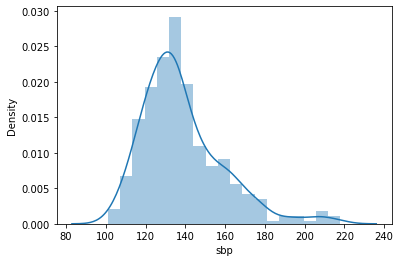

tobacco


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


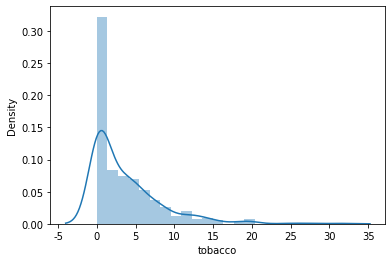

ldl


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


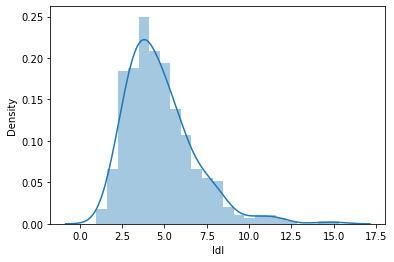

adiposity


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


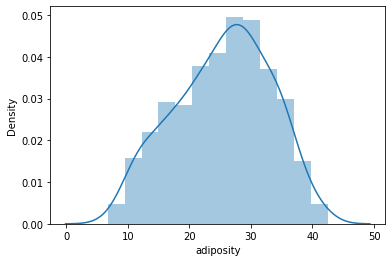

typea


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


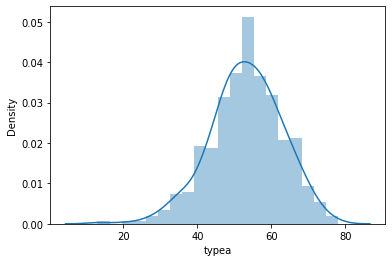

obesity


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


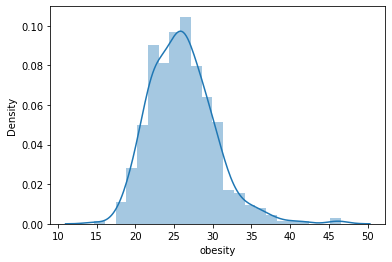

alcohol


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


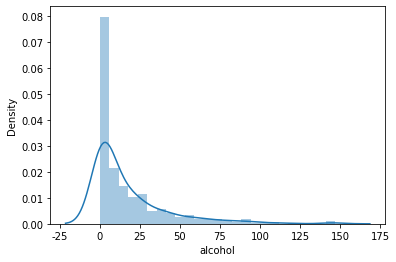

age


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


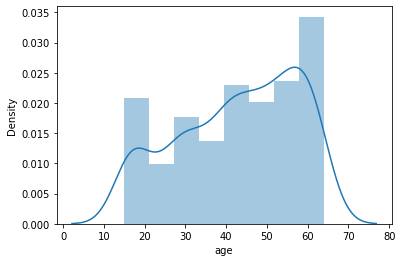

In [ ]:
col = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

for i in col:
  print(i)
  sns.distplot(heart[i])
  plt.show()
  plt.close()

## 이상치 확인

In [ ]:
data = []
for i in col:
  data.append(heart[i])
data

[0      160
 1      144
 2      118
 3      170
 4      134
       ... 
 457    214
 458    182
 459    108
 460    118
 461    132
 Name: sbp, Length: 462, dtype: int64, 0      12.00
 1       0.01
 2       0.08
 3       7.50
 4      13.60
        ...  
 457     0.40
 458     4.20
 459     3.00
 460     5.40
 461     0.00
 Name: tobacco, Length: 462, dtype: float64, 0       5.73
 1       4.41
 2       3.48
 3       6.41
 4       3.50
        ...  
 457     5.98
 458     4.41
 459     1.59
 460    11.61
 461     4.82
 Name: ldl, Length: 462, dtype: float64, 0      23.11
 1      28.61
 2      32.28
 3      38.03
 4      27.78
        ...  
 457    31.72
 458    32.10
 459    15.23
 460    30.79
 461    33.41
 Name: adiposity, Length: 462, dtype: float64, 0      49
 1      55
 2      52
 3      51
 4      60
        ..
 457    64
 458    52
 459    40
 460    64
 461    62
 Name: typea, Length: 462, dtype: int64, 0      25.30
 1      28.87
 2      29.14
 3      31.99
 4      25.99
       

sbp, tobacco, ldl, typea, obesity, alcohol에 이상치 존재

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


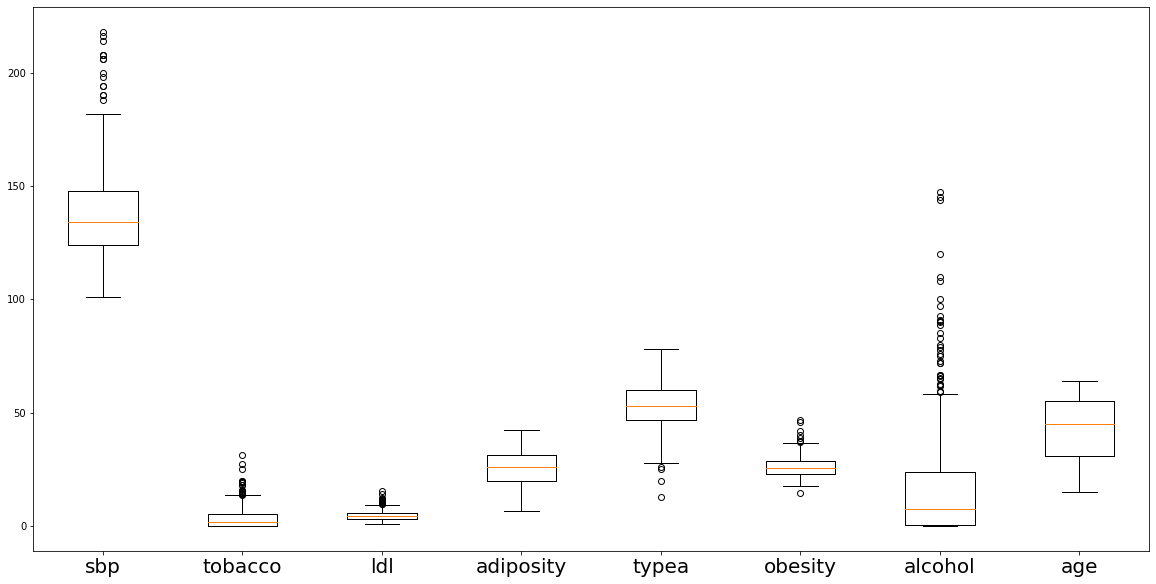

In [ ]:
plt.figure(figsize = (20,10))
plt.rc('xtick', labelsize=20) 
plt.boxplot(data)
plt.xticks(range(1,9), col)
plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


sbp


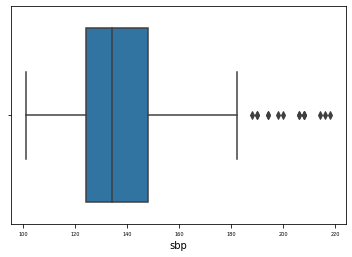

tobacco


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


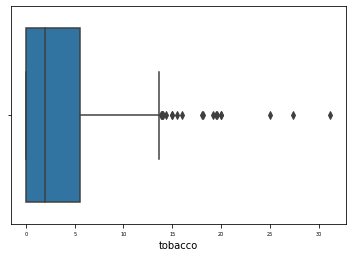

ldl


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


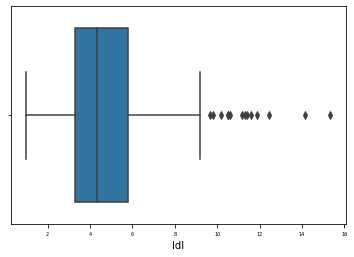

adiposity


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


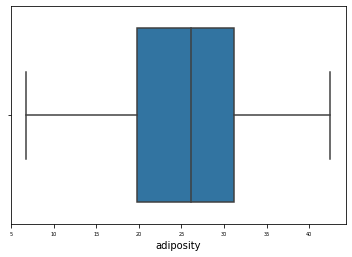

typea


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


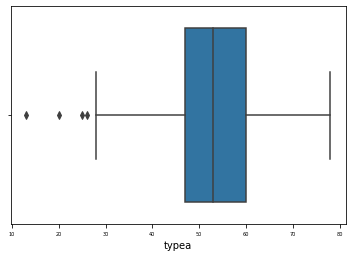

obesity


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


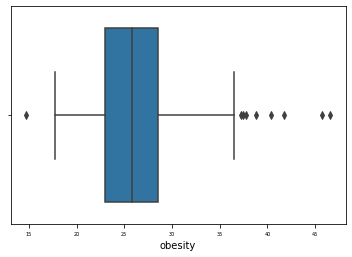

alcohol


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


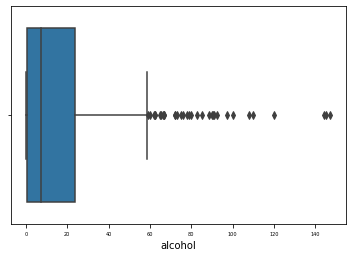

age


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


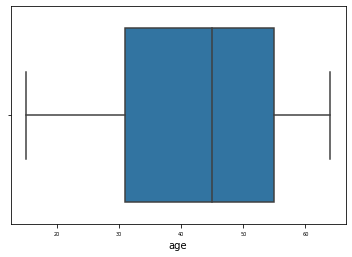

In [ ]:
for i in col:
  print(i)
  plt.rc('xtick', labelsize=5) 
  sns.boxplot(heart[i])
  plt.show()
  plt.close()

## 범주형 변수 -> 지시변수 생성

present : 1

abscent : 0

In [ ]:
le = LabelEncoder()
le = le.fit(heart.famhist)
heart.famhist = le.transform(heart.famhist)
heart

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,458,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,459,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,460,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,461,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


# 0. 데이터셋 분리

In [ ]:
heart

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,458,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,459,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,460,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,461,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(heart.iloc[:,1:-1],
                                                    heart.iloc[:,-1,],
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 100)
print('train data - ', X_train)
print('train target - ', y_train)
print('test data - ', X_test)
print('test target - ', y_test)

train data -       sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age
344  137     1.20  3.14      23.87        0     66    24.13    45.00   37
370  148     8.20  7.75      34.46        1     46    26.53     6.04   64
136  116     2.70  3.69      13.52        0     55    21.13    18.51   32
64   130     0.00  1.82      10.45        0     57    22.07     2.06   17
197  162     2.92  3.63      31.33        0     62    31.59    18.51   42
..   ...      ...   ...        ...      ...    ...      ...      ...  ...
343  138     0.87  1.87      15.89        0     44    26.76    42.99   31
359  152     1.68  3.58      25.43        0     50    27.03     0.00   32
323  140     8.60  3.90      32.16        1     52    28.51    11.11   64
280  106     1.08  4.37      26.08        0     67    24.07    17.74   28
8    114     0.00  3.83      19.40        1     49    24.86     2.49   29

[346 rows x 9 columns]
train target -  344    0
370    1
136    0
64     0
197    0
      ..
343 

# 1. 99백분위수*2 넘어서면 이상치로 판단

  99백분위수*2 넘어가는 것 X

In [ ]:
for i in col:
  outlier = heart[i].quantile(0.99)*2
  print(heart.loc[heart[i] <= outlier,i].count())

462
462
462
462
462
462
462
462


일단 모델 적합해보기

## 로지스틱 회귀분석

chd 분포) 0 : 1 = 2: 1

In [ ]:
# chd분포 확인
heart.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [ ]:
# SMOTE
smote = SMOTE(random_state = 100)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('shape - ', X_train.shape, y_train.shape)
print('레이블 분포 - \n', y_train.value_counts())
print()
print('shape - ', X_train_over.shape, y_train_over.shape)
print('smote 적용 후 레이블 값 분포 - \n', y_train_over.value_counts())

shape -  (346, 9) (346,)
레이블 분포 - 
 0    232
1    114
Name: chd, dtype: int64

shape -  (464, 9) (464,)
smote 적용 후 레이블 값 분포 - 
 0    232
1    232
Name: chd, dtype: int64


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)
lr_preds = lr.predict(X_test)

print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        70
           1       0.54      0.59      0.56        46

    accuracy                           0.64       116
   macro avg       0.63      0.63      0.63       116
weighted avg       0.64      0.64      0.64       116



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


tobacco, ldl, adiposity, famhist, age 변수가 chd에 영향을 미침

In [ ]:
logit = sm.Logit(heart.iloc[:, -1], heart.iloc[:,1:-1])
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.536857
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.168     
Dependent Variable: chd              AIC:              514.0563  
Date:               2022-05-25 11:29 BIC:              551.2764  
No. Observations:   462              Log-Likelihood:   -248.03   
Df Model:           8                LL-Null:          -298.05   
Df Residuals:       453              LLR p-value:      4.1658e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
sbp           -0.0070    0.0049  -1.4130  0.1576  -0.0166   0.0027
tobacco        0.0865    0.0262   3.3001  0.0010   0.0351   0.1379
ldl            0.1614    0.0588   2.7466  0.0060   0.0462   0.2766
adiposity      0.0671    0.0276   2.4341  0.0149   0.0131   0.1211
famhist        0.9287    0.2238   4.1492  0.0000   0.4900   1.3674
typea          0.0104    0.0102   1.0207  0.3074  -0.0096   0.0303
obesity       -0.1797    0.0407  -4.4102  0.0000  -0.2595  -0.0998
alcohol       -0.0002    0.0045  -0.0373  0.9703  -0.0089   0.0086
age            0.0271    0.0108   2.4963  0.0126   0.0058   0.0483
=================================================================

"""

ldl, famhist, obesity, age 변수가 chd에 영향을 미침

모델 설명력이 너무 낮음

In [ ]:
logit = sm.Logit( y_train_over, X_train_over)
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.566867
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.182     
Dependent Variable: chd              AIC:              544.0525  
Date:               2022-05-25 11:29 BIC:              581.3115  
No. Observations:   464              Log-Likelihood:   -263.03   
Df Model:           8                LL-Null:          -321.62   
Df Residuals:       455              LLR p-value:      1.2612e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
sbp           -0.0064    0.0049  -1.2972  0.1946  -0.0161   0.0033
tobacco        0.0566    0.0294   1.9279  0.0539  -0.0009   0.1142
ldl            0.2522    0.0611   4.1256  0.0000   0.1324   0.3720
adiposity      0.0461    0.0275   1.6743  0.0941  -0.0079   0.1000
famhist        0.6735    0.2180   3.0899  0.0020   0.2463   1.1007
typea          0.0062    0.0099   0.6260  0.5313  -0.0132   0.0256
obesity       -0.1672    0.0393  -4.2528  0.0000  -0.2443  -0.0902
alcohol        0.0041    0.0042   0.9764  0.3289  -0.0041   0.0124
age            0.0430    0.0109   3.9386  0.0001   0.0216   0.0644
=================================================================

"""

## 선형적인 독립변수 개발

+ 변수 세분화 : 모든 연속형 변수를 그룹으로 세분화 시켜서 범주형 변수로 만들기 (10개의 그룹으로 나눠서 분할표 확인)

  3IQR로 전처리 했을 때랑 비교해보기


In [ ]:
col

['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

In [ ]:
for c in col:
  heart[c + '_grp'] = 0
  for i in heart.index:
    if heart[c][i] <= heart[c].quantile(0.1):
      heart[c + '_grp'][i] = 1
    elif heart[c][i] <= heart[c].quantile(0.2):
      heart[c + '_grp'][i] = 2
    elif heart[c][i] <= heart[c].quantile(0.3):
      heart[c + '_grp'][i] = 3
    elif heart[c][i] <= heart[c].quantile(0.4):
      heart[c + '_grp'][i] = 4
    elif heart[c][i] <= heart[c].quantile(0.5):
      heart[c + '_grp'][i] = 5
    elif heart[c][i] <= heart[c].quantile(0.6):
      heart[c + '_grp'][i] = 6
    elif heart[c][i] <= heart[c].quantile(0.7):
      heart[c + '_grp'][i] = 7
    elif heart[c][i] <= heart[c].quantile(0.8):
      heart[c + '_grp'][i] = 8
    elif heart[c][i] <= heart[c].quantile(0.9):
      heart[c + '_grp'][i] = 9
    else:
      heart[c + '_grp'][i] = 10
heart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,sbp_grp,tobacco_grp,ldl_grp,adiposity_grp,typea_grp,obesity_grp,alcohol_grp,age_grp
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1,9,10,8,4,3,5,10,7
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1,7,3,6,7,6,8,4,10
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0,1,3,3,8,5,9,5,6
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1,10,9,9,10,4,10,8,8
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1,5,10,3,6,8,6,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,458,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0,10,3,8,8,9,8,1,8
458,459,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1,10,7,6,8,5,8,7,7
459,460,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0,1,6,1,2,1,1,8,8
460,461,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0,1,8,10,8,9,7,8,4


In [ ]:
# 각 그룹이 비슷한 수의 관찰치를 가지나?
for c in col:
  print(c)
  print(heart[c + '_grp'].value_counts())
  print()
# 데이터가 한쪽으로 몰려있으면 그 쪽 그룹이 많아짐
# 3IQR로 이상치 제거했을 때 사용하는 게 좋겠다!

sbp
1     67
5     53
8     50
6     48
4     47
9     43
3     43
10    41
7     38
2     32
Name: sbp_grp, dtype: int64

tobacco
1     107
7      51
5      49
10     47
9      46
6      43
4      42
8      41
3      36
Name: tobacco_grp, dtype: int64

ldl
4     50
1     48
10    47
8     46
6     46
3     46
9     46
2     45
7     45
5     43
Name: ldl_grp, dtype: int64

adiposity
10    47
1     47
4     46
7     46
8     46
6     46
2     46
3     46
9     46
5     46
Name: adiposity_grp, dtype: int64

typea
2     57
6     56
3     51
1     50
8     48
10    46
9     42
5     39
7     37
4     36
Name: typea_grp, dtype: int64

obesity
10    47
1     47
5     46
8     46
9     46
6     46
3     46
7     46
2     46
4     46
Name: obesity_grp, dtype: int64

alcohol
1     110
10     47
8      47
6      47
4      46
5      46
7      45
9      45
3      29
Name: alcohol_grp, dtype: int64

age
5     53
7     50
8     50
3     49
1     48
9     47
2     46
4     45
6     41
10    33
Name:

카이제곱 검정

sbp 그룹과 chd는 독립

In [ ]:
result = pd.crosstab(heart.chd, heart.sbp_grp, normalize=True, margins =True)
result

sbp_grp,1,2,3,4,5,6,7,8,9,10,All
chd,,,,,,,,,,,
0,0.106061,0.049784,0.064935,0.077922,0.077922,0.071429,0.051948,0.069264,0.051948,0.032468,0.65368
1,0.038961,0.019481,0.028139,0.023810,0.036797,0.032468,0.030303,0.038961,0.041126,0.056277,0.34632
All,0.145022,0.069264,0.093074,0.101732,0.114719,0.103896,0.082251,0.108225,0.093074,0.088745,1.00000


In [ ]:
stats.chi2_contingency(observed = result)

(0.048971758753126156,
 1.0,
 20,
 array([[0.0947977 , 0.04527651, 0.06084031, 0.06649988, 0.07498922,
         0.06791477, 0.05376586, 0.07074455, 0.06084031, 0.05801053,
         0.65367965],
        [0.05022395, 0.02398756, 0.03223328, 0.03523172, 0.03972939,
         0.03598133, 0.02848522, 0.03748056, 0.03223328, 0.03073406,
         0.34632035],
        [0.14502165, 0.06926407, 0.09307359, 0.1017316 , 0.11471861,
         0.1038961 , 0.08225108, 0.10822511, 0.09307359, 0.08874459,
         1.        ]]))

In [ ]:
col

['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

typea, obesity, alcohol은 독립 X

In [ ]:
for c in col:
  result = pd.crosstab(heart.chd, heart[c + '_grp'])
  print(c)
  print(stats.chi2_contingency(observed = result))
  print()

sbp
(22.624952543944282, 0.007095882848205596, 9, array([[43.7965368 , 20.91774892, 28.10822511, 30.72294372, 34.64502165,
        31.37662338, 24.83982684, 32.68398268, 28.10822511, 26.8008658 ],
       [23.2034632 , 11.08225108, 14.89177489, 16.27705628, 18.35497835,
        16.62337662, 13.16017316, 17.31601732, 14.89177489, 14.1991342 ]]))

tobacco
(58.94537050272304, 7.502185108869458e-10, 8, array([[69.94372294, 23.53246753, 27.45454545, 32.03030303, 28.10822511,
        33.33766234, 26.8008658 , 30.06926407, 30.72294372],
       [37.05627706, 12.46753247, 14.54545455, 16.96969697, 14.89177489,
        17.66233766, 14.1991342 , 15.93073593, 16.27705628]]))

ldl
(36.6415273419229, 3.0490339465504234e-05, 9, array([[31.37662338, 29.41558442, 30.06926407, 32.68398268, 28.10822511,
        30.06926407, 29.41558442, 30.06926407, 30.06926407, 30.72294372],
       [16.62337662, 15.58441558, 15.93073593, 17.31601732, 14.89177489,
        15.93073593, 15.58441558, 15.93073593, 15.93073593

ldl_grp는 5,6 기준으로 나누면 좋을듯
adiposity_grp, obesity_grp는 4,5 기준으로 나누면 좋을듯

In [ ]:
for c in col:
  result = pd.crosstab(heart.chd, heart[c + '_grp'], normalize=True, margins =True)
  print(c)
  print(result)
  print()

sbp
sbp_grp         1         2         3         4         5         6         7  \
chd                                                                             
0        0.106061  0.049784  0.064935  0.077922  0.077922  0.071429  0.051948   
1        0.038961  0.019481  0.028139  0.023810  0.036797  0.032468  0.030303   
All      0.145022  0.069264  0.093074  0.101732  0.114719  0.103896  0.082251   

sbp_grp         8         9        10      All  
chd                                             
0        0.069264  0.051948  0.032468  0.65368  
1        0.038961  0.041126  0.056277  0.34632  
All      0.108225  0.093074  0.088745  1.00000  

tobacco
tobacco_grp         1         3         4         5         6         7  \
chd                                                                       
0            0.199134  0.067100  0.058442  0.071429  0.051948  0.058442   
1            0.032468  0.010823  0.032468  0.034632  0.041126  0.051948   
All          0.231602  0.077922  0.0

+ 변수 변환

정규 분포 형태의 표준 스케일링 적용

In [ ]:
heart[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,118,0.08,3.48,32.28,52,29.14,3.81,46
3,170,7.50,6.41,38.03,51,31.99,24.26,58
4,134,13.60,3.50,27.78,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58
458,182,4.20,4.41,32.10,52,28.61,18.72,52
459,108,3.00,1.59,15.23,40,20.09,26.64,55
460,118,5.40,11.61,30.79,64,27.35,23.97,40


In [ ]:
num_var = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(heart[num_var])

In [ ]:
data_std

array([[ 1.05856354,  1.82307289,  0.47841217, ..., -0.17678588,
         3.27773797,  0.62933573],
       [ 0.27708929, -0.79023744, -0.15967999, ...,  0.67137291,
        -0.61274463,  1.3831147 ],
       [-0.99280637, -0.77498042, -0.60924492, ...,  0.73551937,
        -0.5411833 ,  0.21818356],
       ...,
       [-1.48122778, -0.13854454, -1.52287687, ..., -1.41457504,
         0.39238531,  0.83491181],
       [-0.99280637,  0.38455344,  3.32082269, ...,  0.31025208,
         0.28320317, -0.1929686 ],
       [-0.3090164 , -0.79241702,  0.0385153 , ..., -2.69512851,
        -0.69698253,  0.21818356]])

In [ ]:
heart.iloc[:,1:-1].columns
data_std = pd.DataFrame(data_std, columns = ['std_sbp', 'std_tobacco', 'std_ldl', 'std_adiposity', 'std_typea', 'std_obesity', 'std_alcohol', 'std_age'])
data_std

,std_sbp,std_tobacco,std_ldl,std_adiposity,std_typea,std_obesity,std_alcohol,std_age
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760
...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488
458,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336
459,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912
460,-0.992806,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969


In [ ]:
heart_merge = pd.merge(heart, data_std, left_index = True, right_index = True)
heart_merge

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,...,alcohol_grp,age_grp,std_sbp,std_tobacco,std_ldl,std_adiposity,std_typea,std_obesity,std_alcohol,std_age
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,...,10,7,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,...,4,10,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,...,5,6,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,...,8,8,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,...,10,6,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,458,214,0.40,5.98,31.72,0,64,28.45,0.00,58,...,1,8,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488
458,459,182,4.20,4.41,32.10,0,52,28.61,18.72,52,...,7,7,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336
459,460,108,3.00,1.59,15.23,0,40,20.09,26.64,55,...,8,8,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912
460,461,118,5.40,11.61,30.79,0,64,27.35,23.97,40,...,8,4,-0.992806,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969


다양한 변수 생성

In [ ]:
for i in num_var :
  heart_merge[i + '_sq']   = heart_merge[i]**2  #squared
  heart_merge[i + '_cu']   = heart_merge[i]**3  #cubed
  heart_merge[i + '_sqrt']   = np.sqrt(heart_merge[i]) # square root
  heart_merge[i + '_curt']   = heart_merge[i]**0.3333 # cube root
  heart_merge[i + '_log']   = np.log(heart_merge[i]) # log
  heart_merge[i + '_exp']   = np.exp( heart_merge[i]) # exponent
                                     
  heart_merge[i + '_tan']   = np.tan( heart_merge[i]) # tangent
  heart_merge[i + '_sin']   = np.sin( heart_merge[i]) # sine
  heart_merge[i + '_cos']   = np.cos( heart_merge[i]) # cosine

  heart_merge[i + '_inv']   = 1/heart_merge[i] # inverse
  heart_merge[i + '_sqi']   = 1/(heart_merge[i]**2) # squared inverse
  heart_merge[i + '_cui']   = 1/(heart_merge[i]**3) # cubed inverse
  heart_merge[i + '_sqri']   = 1/np.sqrt(heart_merge[i]) # square root inv
  heart_merge[i + '_curi']   = 1/(heart_merge[i]**0.3333) # cube root inverse

  heart_merge[i + '_logi']   = 1/np.log( heart_merge[i]) # log inverse
  heart_merge[i + '_expi']   = 1/ np.exp( heart_merge[i]) # exponent inv

  heart_merge[i + '_tani']   = 1/np.tan( heart_merge[i]) # tangent inverse
  heart_merge[i + '_sini']   = 1/np.sin( heart_merge[i]) # sine inverse
  heart_merge[i + '_cosi']   = 1/np.cos( heart_merge[i]) # cosine inverse

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is h

In [ ]:
age_var = heart_merge.columns[heart_merge.columns.str.contains('age')]

In [ ]:
## 전진 단계별 선택법
variables = age_var.tolist() ## 설명 변수 리스트
y = heart_merge.chd
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = heart_merge[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.Logit(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = heart_merge[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.Logit(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.Logit(y,sm.add_constant(heart_merge[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.585842
         Iterations 5
         Current function value: 0.645142
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.575264
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565661
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.644199
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.568790
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.641113
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568122
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.639200
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.581861
         Iterations 5
Optimization ter

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AttributeError: ignored

In [ ]:
selected_variables

['age',
 'age_famhist_sbp',
 'age_exp',
 'age_expi',
 'age_cu',
 'age_logi',
 'age_inv',
 'age_cosi',
 'age_curi',
 'std_age',
 'age_sqri',
 'age_sqi',
 'age_cos',
 'age_sq',
 'age_log',
 'age_tani',
 'age_cui',
 'age_sqrt',
 'age_curt',
 'age_grp',
 'age_famhist_typea',
 'age_sini',
 'age_sin',
 'age_tan']

4.6 상호 작용 찾기

의사결정 나무로부터 얻어진 상호작용 정보 이용하기

In [ ]:
y = heart[['chd']]
y

,chd
0,1
1,1
2,0
3,1
4,1
...,...
457,0
458,1
459,0
460,0


In [ ]:
X = heart_merge.drop(['id', 'chd'], axis =1)
X

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,sbp_grp,...,age_grp,std_sbp,std_tobacco,std_ldl,std_adiposity,std_famhist,std_typea,std_obesity,std_alcohol,std_age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,9,...,7,1.058564,1.823073,0.478412,-0.295503,1.185854,-0.418470,-0.176786,3.277738,0.629336
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,7,...,10,0.277089,-0.790237,-0.159680,0.412140,-0.843274,0.193344,0.671373,-0.612745,1.383115
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1,...,6,-0.992806,-0.774980,-0.609245,0.884332,1.185854,-0.112563,0.735519,-0.541183,0.218184
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,10,...,8,1.546985,0.842264,0.807126,1.624141,1.185854,-0.214532,1.412621,0.295062,1.040488
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,5,...,6,-0.211332,2.171805,-0.599577,0.305351,1.185854,0.703189,-0.012856,1.647775,0.423760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,10,...,8,3.696039,-0.705234,0.599263,0.812281,-0.843274,1.111065,0.571590,-0.696983,1.040488
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,10,...,7,2.133091,0.123004,-0.159680,0.861173,-0.843274,-0.112563,0.609602,0.068519,0.629336
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,1,...,8,-1.481228,-0.138545,-1.522877,-1.309364,-0.843274,-1.336191,-1.414575,0.392385,0.834912
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,1,...,4,-0.992806,0.384553,3.320823,0.692625,-0.843274,1.111065,0.310252,0.283203,-0.192969


In [ ]:
heart.iloc[:,1:10]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(heart.iloc[:,1:10],
                                                    y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 100)
print('train data - ', X_train)
print('train target - ', y_train)
print('test data - ', X_test)
print('test target - ', y_test)

train data -       sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age
344  137     1.20  3.14      23.87        0     66    24.13    45.00   37
370  148     8.20  7.75      34.46        1     46    26.53     6.04   64
136  116     2.70  3.69      13.52        0     55    21.13    18.51   32
64   130     0.00  1.82      10.45        0     57    22.07     2.06   17
197  162     2.92  3.63      31.33        0     62    31.59    18.51   42
..   ...      ...   ...        ...      ...    ...      ...      ...  ...
343  138     0.87  1.87      15.89        0     44    26.76    42.99   31
359  152     1.68  3.58      25.43        0     50    27.03     0.00   32
323  140     8.60  3.90      32.16        1     52    28.51    11.11   64
280  106     1.08  4.37      26.08        0     67    24.07    17.74   28
8    114     0.00  3.83      19.40        1     49    24.86     2.49   29

[346 rows x 9 columns]
train target -       chd
344    0
370    1
136    0
64     0
197    0
..  

In [ ]:
heart.columns[1:10]

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age'],
      dtype='object')

In [ ]:
y_train.value_counts()

chd
0      232
1      114
dtype: int64

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)
dt_graph = export_graphviz(dt,
                out_file = 'dt_tree.dot',
                class_names = ['0','1'],
                feature_names = heart.columns[1:10],
                impurity = True,
                filled = True)

+ 주황색) class = 0
+ 파랑색) class = 1
+ 색이 진할수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다
(지니지수가 낮을수록 순수도는 높은 것이고 분리가 잘 이루어졌다고 평가)


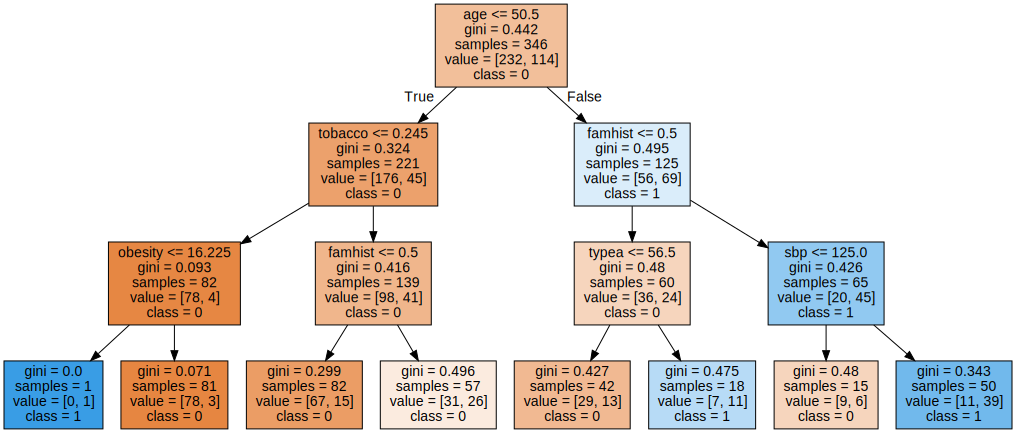

In [ ]:
import os

os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# cancer_tree.dot 파일을 Graphviz가 읽어서 시각화 해줌
with open('/content/dt_tree.dot') as file :
  cancer_graph = file.read()

Source(cancer_graph)

In [ ]:
heart_merge['age_famhist_typea'] = 0
heart_merge.loc[(heart_merge['age'] >= 51) & (heart_merge['famhist'] ==0) & (heart_merge['typea'] > 56.5),'age_famhist_typea'] = 1
heart_merge['age_famhist_typea']

0      0
1      0
2      0
3      0
4      0
      ..
457    1
458    0
459    0
460    0
461    0
Name: age_famhist_typea, Length: 462, dtype: int64

In [ ]:
heart_merge['age_famhist_typea'].value_counts()

0    440
1     22
Name: age_famhist_typea, dtype: int64

In [ ]:
heart_merge['age_famhist_sbp'] = 0
heart_merge.loc[(heart_merge['age'] >= 51) & (heart_merge['famhist'] ==1) & (heart_merge['sbp'] > 125),'age_famhist_sbp'] = 1
heart_merge['age_famhist_sbp']

0    392
1     70
Name: age_famhist_sbp, dtype: int64

In [ ]:
heart_merge['age_famhist_sbp'].value_counts()

0    392
1     70
Name: age_famhist_sbp, dtype: int64

5.1.2 변수 선택 & 십분위분석

# 2. 3IQR 넘어서면 이상치로 판단

일단 모델 적합해보기